<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_09/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("data/BC.csv", sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




1. Realice un análisis exploratorio del conjunto de datos.

In [3]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Con "describe()" se puede ver valores como la media, desviación estándar, valores mínimos, máximos, etc, de cada columna.

In [4]:
print(df.shape)
df.columns

(569, 32)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Se muestra el nombre de las columnas, además, el set de datos tiene 569 filas y 32 columnas.
Dentro de las variables de las columnas, "id" no entrega mucha información relevante (puede ser eliminado), mientras que diagnosis entrega información si el tumor es benigno (0) o maligno (0). Veamos cuantos corresponden a cada uno.

Se debe verificar que no existan datos nulos, en cuyo caso deben ser reemplazados

In [5]:
df.drop('id', axis =1, inplace = True)
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Revisemos algunas variables

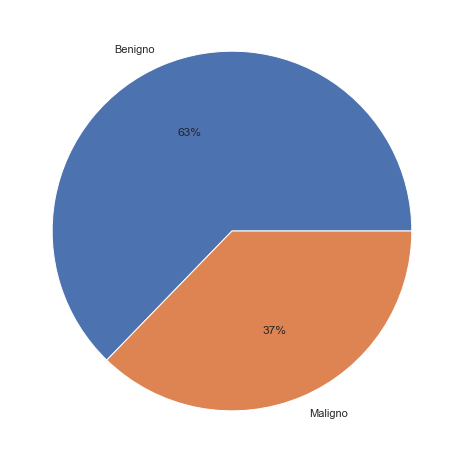

In [6]:
tipo_tumor = df['diagnosis'].value_counts()
labels = ['Benigno','Maligno']
plt.pie(tipo_tumor,labels=labels,autopct = '%0.0f%%')
plt.show()

En el gráfico circular se aprecia que hay una mayor proporción de tumores benignos que malignos.

Se puede estudiar una correlación entre las variables 'mean' (media), 'se' (desviación estándar) y 'worst' (promedio de los 3 peores valores).

<AxesSubplot:>

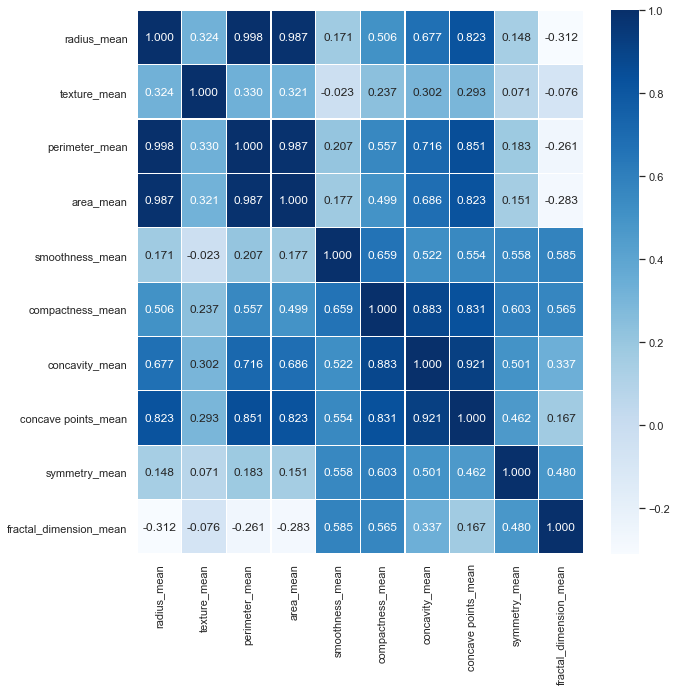

In [7]:
droplist_se_worst = ['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

col_mean = df.drop(droplist_se_worst, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(col_mean.drop(['diagnosis'],axis=1).corr(), annot=True, linewidths=.2, fmt= '.3f', cmap='Blues')

Entre mas oscuro es el color azul, mayormente están relacionadas las variables. Por ejemplo para la primera fila correspondiente al radio medio, se ve que está mas relacionado con las variables de perímetro y área media, pero cuando se compara con la variable de dimensión fractal se tiene un valor negativo, esto significa que no tienen ninguna relación.

<AxesSubplot:>

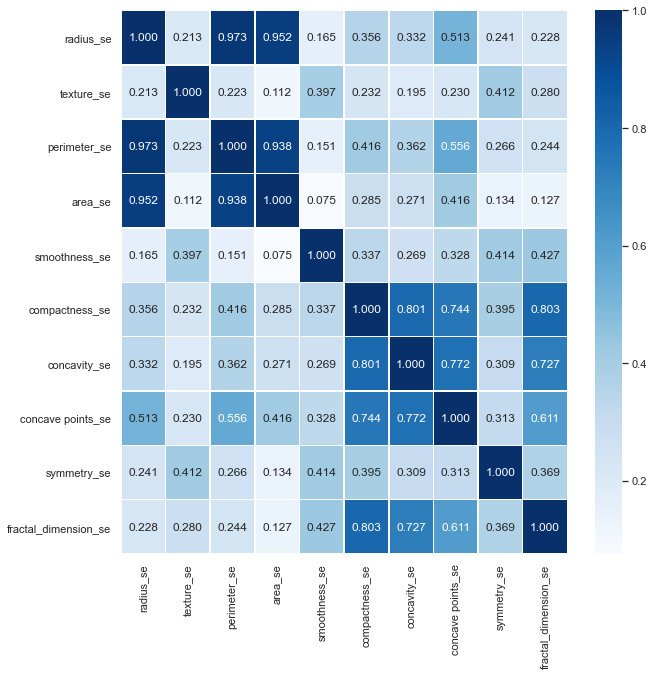

In [8]:
droplist_mean_worst = ['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

col_se = df.drop(droplist_mean_worst, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(col_se.drop(['diagnosis'],axis=1).corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='Blues')

Al comparar las correlaciones entre estas variables, se observa que el color azul es menos intenso en comparación al mapa anterior. Una buena correlación se puede establecer como los valores que son superiores a 0.9, por ejemplo, nuevamente el radio está muy correlacionado con el perímetro y el área, está vez la variable con la que esta menos relacionada el radio es "smoothness".

<AxesSubplot:>

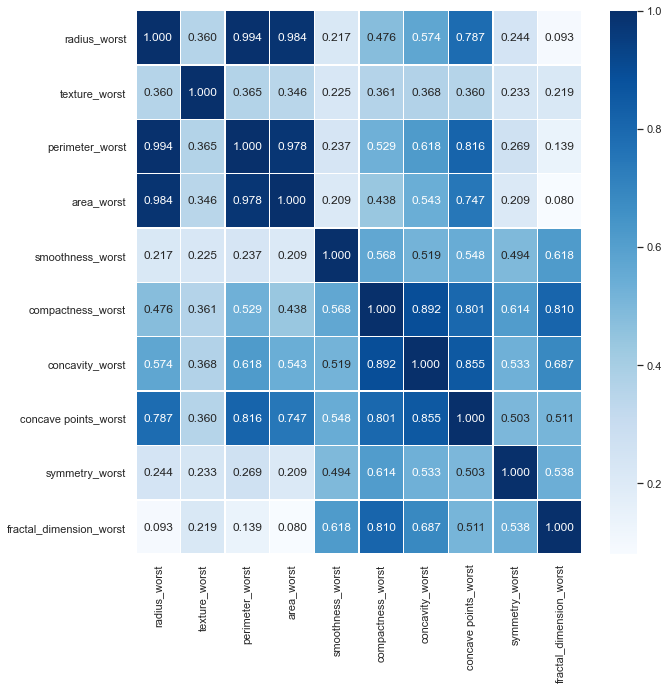

In [9]:
droplist_mean_se = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean','radius_se', 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']

col_worst = df.drop(droplist_mean_se, axis = 1)
f,ax = plt.subplots(figsize=(10, 10))


sns.heatmap(col_worst.drop(['diagnosis'],axis=1).corr(), annot=True, linewidths=.5, fmt= '.3f', cmap ='Blues')

A partir de los 3 mapas, se puede establecer que las variables se correlacionan (o no están correlacionadas) entre si independiente de su valor medio, desviación estándar o promedio de sus 3 valores más bajos. Las variables que están muy correlacionadas entregan practicamente la mismo información, la idea es quitar estas variables para poder evaluar una tendencia, por tanto no se analizarán las siguientes correlaciones:

- area
- perimeter

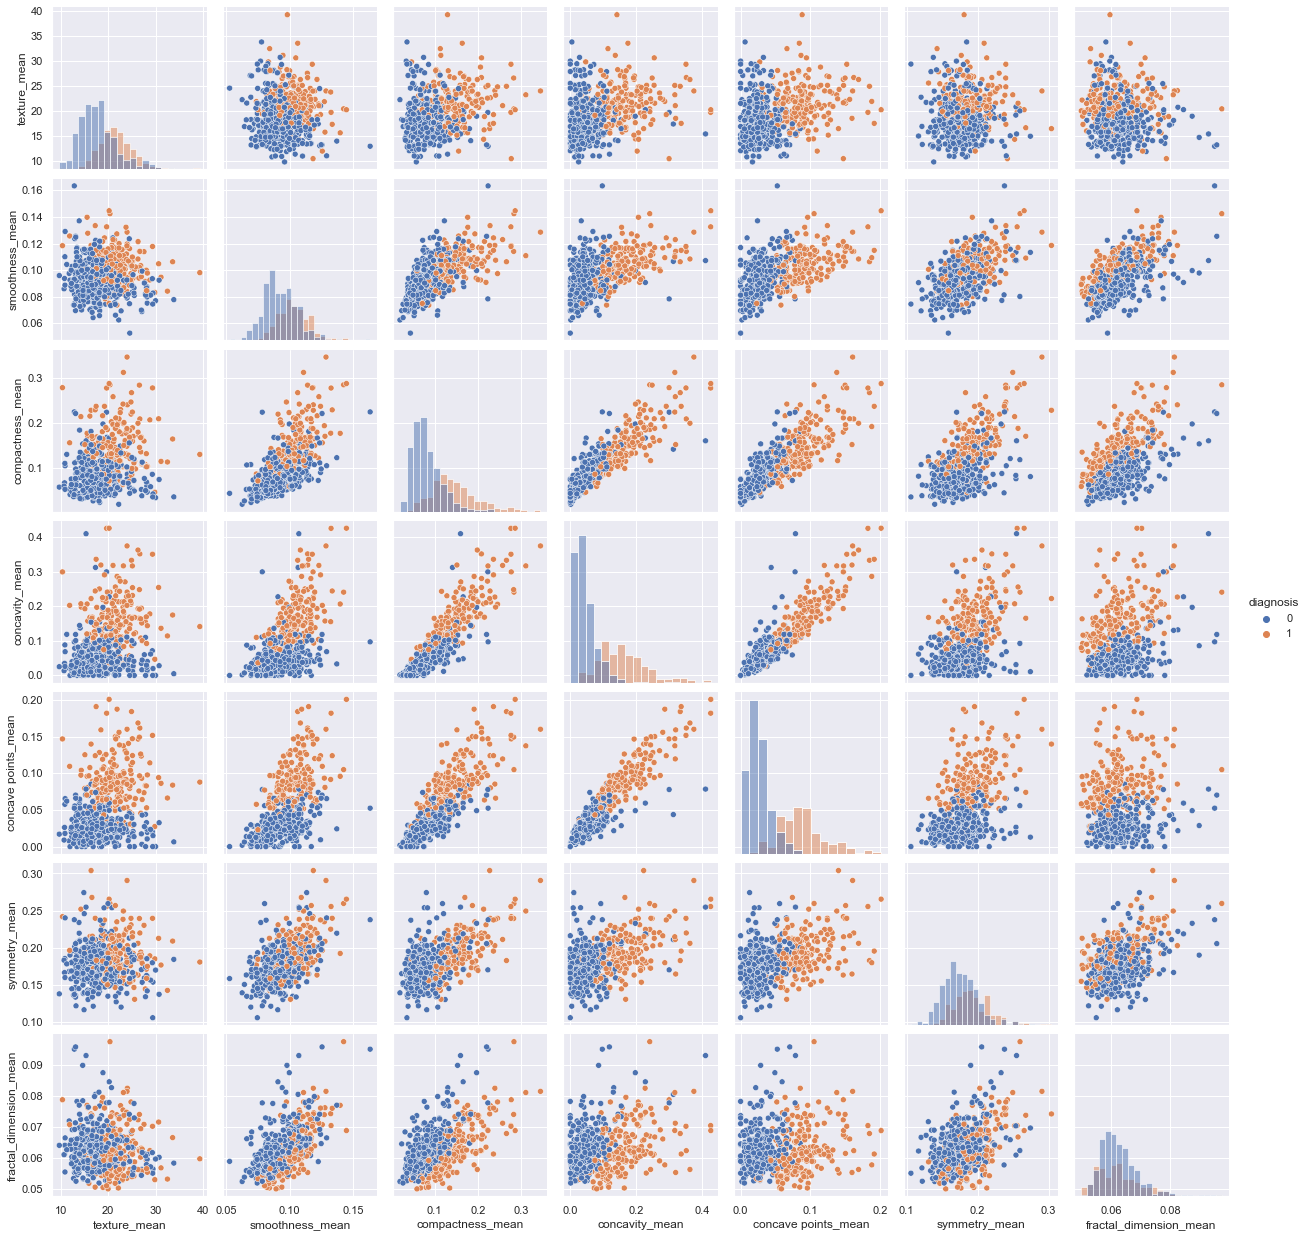

In [10]:
col_mean_2 = col_mean.drop(['radius_mean','perimeter_mean','area_mean'], axis = 1)
sns.pairplot(data = col_mean_2, kind = 'scatter', diag_kind="hist", hue = 'diagnosis')

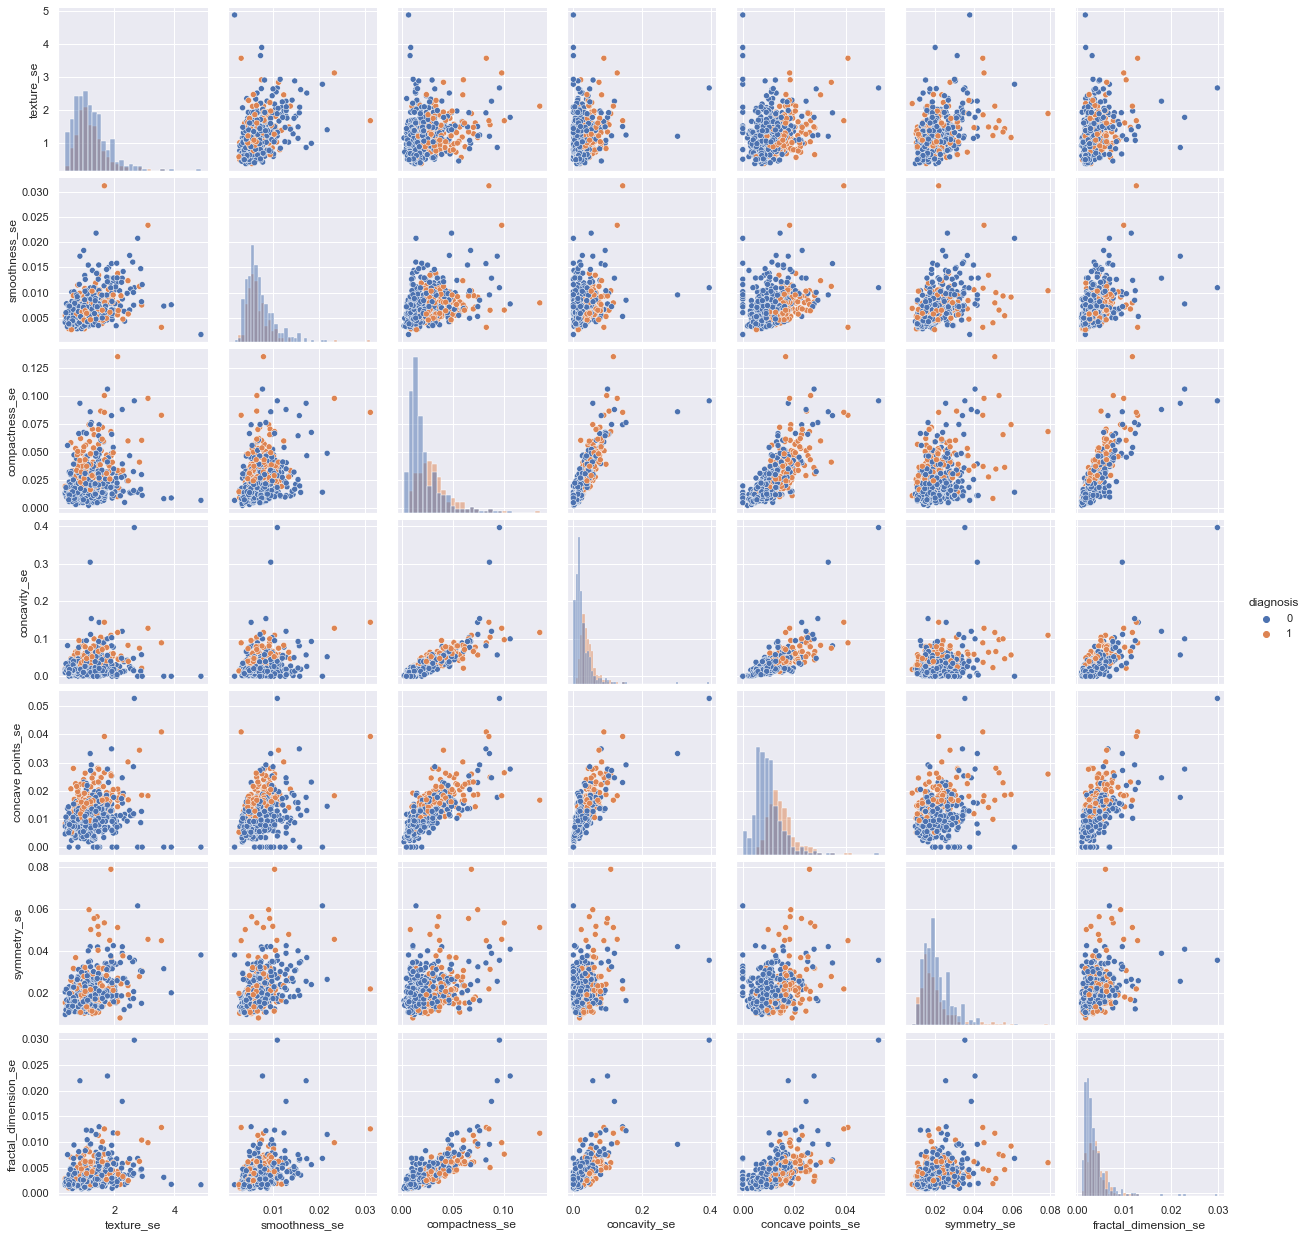

In [11]:
col_se_2 = col_se.drop(['radius_se','perimeter_se','area_se'], axis = 1)
sns.pairplot(data = col_se_2, kind = 'scatter', diag_kind="hist", hue = 'diagnosis')

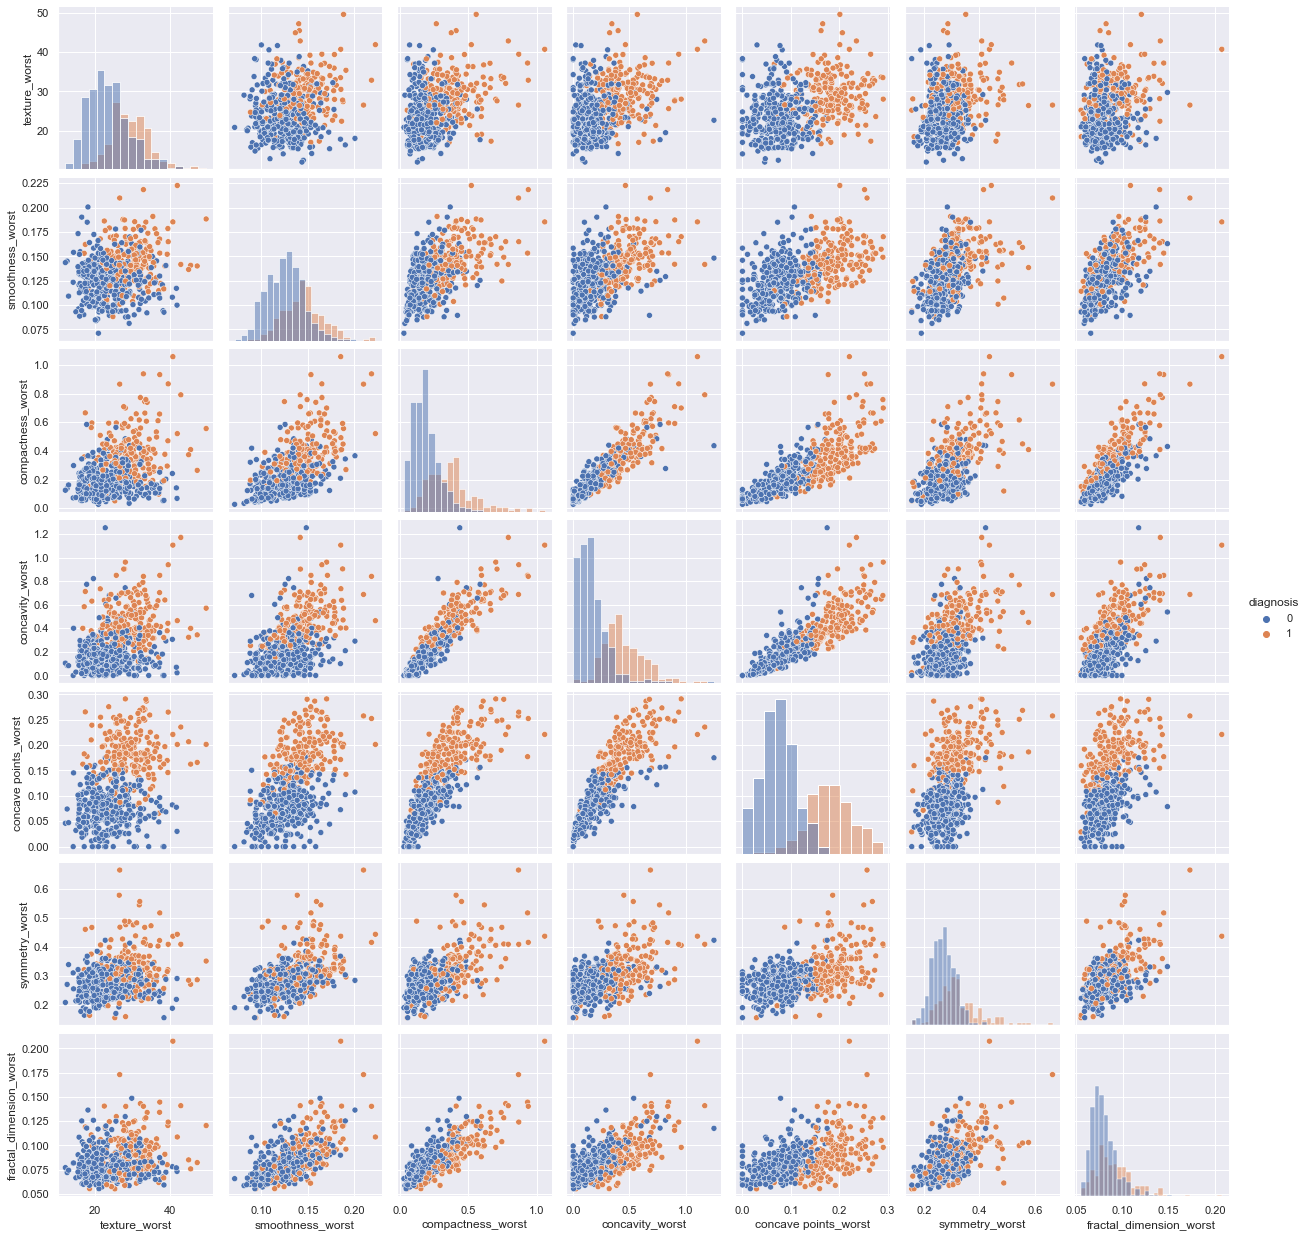

In [12]:
col_worst_2 = col_worst.drop(['radius_worst','perimeter_worst','area_worst'], axis = 1)
sns.pairplot(data = col_worst_2, kind = 'scatter', diag_kind="hist", hue = 'diagnosis')

También se puede observar que las variables "worst" esta muy relacionada con la media y desviación estandar, esta variable se puede eliminar al tener mucha similitud con las variables recién nombradas.

In [13]:
# Variables que no tienen una linealidad o tendencia lineal con otras
worst = df.columns[21:31]
df2 = df.drop(worst, axis = 1).drop(['diagnosis'], axis = 1).drop(['perimeter_se','area_se'], axis = 1).drop(['perimeter_mean','area_mean'], axis = 1)
df2

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [14]:
df2.mean() 
# se muestra la media para poder comparar los resultados con los obtenidos al normalizarlas con el método StandardScaler

radius_mean               14.127292
texture_mean              19.289649
smoothness_mean            0.096360
compactness_mean           0.104341
concavity_mean             0.088799
concave points_mean        0.048919
symmetry_mean              0.181162
fractal_dimension_mean     0.062798
radius_se                  0.405172
texture_se                 1.216853
smoothness_se              0.007041
compactness_se             0.025478
concavity_se               0.031894
concave points_se          0.011796
symmetry_se                0.020542
fractal_dimension_se       0.003795
dtype: float64

2. Normalizar las variables numéricas con el método StandardScaler.

In [15]:
scaler = StandardScaler()
columns = df2.columns
df2[columns]=scaler.fit_transform(df2[columns])
df2.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328


Para verificar la normalización se obtienen los valores medios y desviación estándar de cada variable

In [16]:
df2.mean() 

radius_mean              -1.256562e-16
texture_mean              1.049736e-16
smoothness_mean          -8.226187e-16
compactness_mean          2.419467e-16
concavity_mean           -1.315097e-16
concave points_mean      -8.780323e-17
symmetry_mean             1.957036e-16
fractal_dimension_mean    5.073075e-16
radius_se                 2.588732e-16
texture_se               -8.887638e-17
smoothness_se            -1.588385e-16
compactness_se            2.341419e-16
concavity_se              2.044840e-16
concave points_se         3.707247e-17
symmetry_se               1.242903e-16
fractal_dimension_se     -4.351138e-17
dtype: float64

In [17]:
# muestra la varianza
df2.var() 

radius_mean               1.001761
texture_mean              1.001761
smoothness_mean           1.001761
compactness_mean          1.001761
concavity_mean            1.001761
concave points_mean       1.001761
symmetry_mean             1.001761
fractal_dimension_mean    1.001761
radius_se                 1.001761
texture_se                1.001761
smoothness_se             1.001761
compactness_se            1.001761
concavity_se              1.001761
concave points_se         1.001761
symmetry_se               1.001761
fractal_dimension_se      1.001761
dtype: float64

El radio y la textura eran los valores con una media mas alta, ahora vemos que su valor es prácticamente cero.

3. Realizar un método de reducción de dimensionalidad visto en clases.

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df2)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [19]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df2.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']
)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
PC1,0.175029,0.102446,0.236063,0.341939,0.340478,0.303878,0.241168,0.217564,0.239103,0.102789,0.138084,0.320826,0.294278,0.314757,0.161979,0.266115
PC2,-0.502857,-0.171999,0.041579,-0.100449,-0.211434,-0.328643,0.070298,0.365082,-0.257163,0.204268,0.341218,0.135739,0.105774,0.007391,0.277347,0.289687
PC3,0.079469,0.481239,-0.353359,-0.203738,-0.058379,-0.072999,-0.206584,-0.288757,0.220792,0.566677,0.181638,0.048781,0.071551,0.098021,0.199823,0.032045
PC4,-0.008834,-0.073613,-0.420747,-0.030641,0.057749,-0.102027,-0.372747,-0.037883,-0.180510,-0.260976,-0.221548,0.310320,0.419558,0.218117,-0.298630,0.321804
PC5,0.151132,-0.658231,-0.119644,-0.195832,-0.051048,0.016281,-0.055848,-0.296817,0.352251,-0.166639,0.240722,-0.034441,0.063846,0.211928,0.369160,-0.029727
PC6,0.024227,-0.037494,0.329059,-0.032758,-0.002156,0.078328,-0.477897,0.059969,0.111568,0.043171,0.581548,-0.095864,-0.076230,0.086061,-0.523152,0.043912
PC7,-0.001822,-0.423712,0.142881,0.001937,0.010409,0.043622,-0.199798,0.163626,0.169567,0.621240,-0.521050,-0.094195,-0.020855,-0.013695,-0.134849,0.132197
PC8,0.093096,0.081688,-0.154225,0.154978,-0.020447,0.003339,-0.357218,0.304097,0.370464,-0.233077,-0.020780,0.143203,-0.319075,-0.488572,0.256288,0.312484
PC9,0.070986,-0.013515,0.214682,0.181960,0.149438,0.144118,-0.555229,-0.045050,-0.484472,0.044252,-0.037029,0.078140,0.039348,0.033797,0.469744,-0.307686
PC10,-0.267942,0.297593,0.330721,-0.189813,-0.108692,-0.171757,-0.207513,0.159980,0.382925,-0.280291,-0.281458,-0.286861,0.253574,0.308465,0.173268,-0.089980


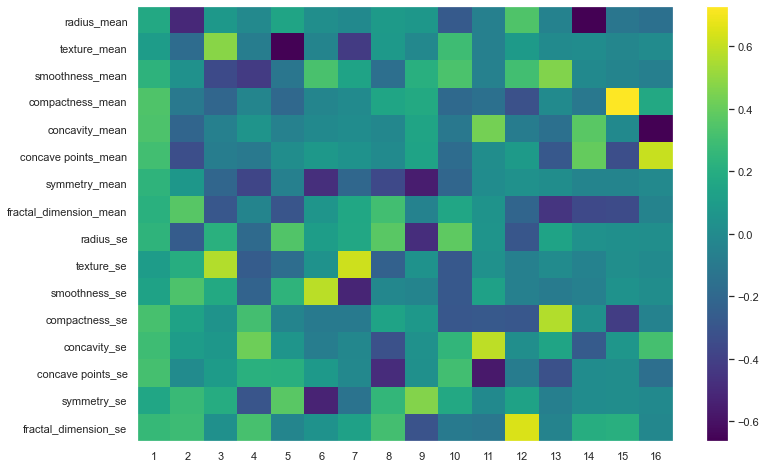

In [20]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,8))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df2.columns)), df2.columns)
plt.xticks(range(len(df2.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

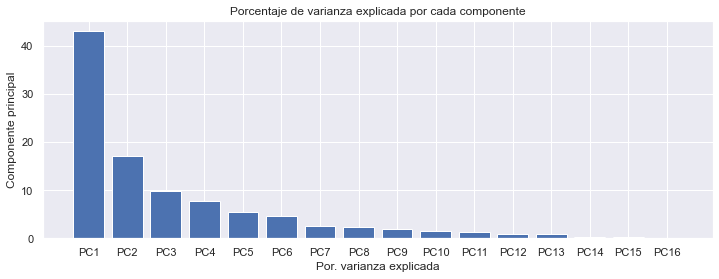

In [21]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,17), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

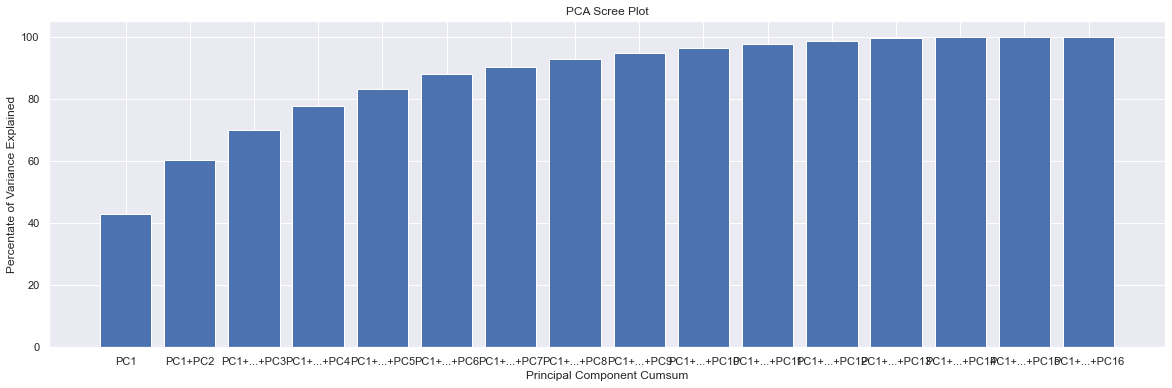

In [22]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

columns = ['PC1',
          'PC1+PC2',
          'PC1+...+PC3', 
          'PC1+...+PC4', 
          'PC1+...+PC5', 
          'PC1+...+PC6',
          'PC1+...+PC7',
          'PC1+...+PC8',
          'PC1+...+PC9',
          'PC1+...+PC10',
          'PC1+...+PC11',
          'PC1+...+PC12',
          'PC1+...+PC13',
          'PC1+...+PC14',
          'PC1+...+PC15',
          'PC1+...+PC16']
plt.figure(figsize=(20,6))
plt.bar(x= range(1,17), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

**Transformación**

In [23]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df2)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'],
    index   = df2.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,5.949664,-0.860600,-2.953048,-1.083900,1.270001,-0.775735,1.170425,1.318900,-0.340396,-0.538941,0.496531,-1.095937,-0.484447,0.204358,0.330026,0.066924
1,-0.589270,-2.241794,-0.121641,0.485807,0.904170,-0.003090,-0.069262,0.009752,-0.686386,-0.363572,-0.302381,0.664297,-0.602337,-0.485991,-0.217533,-0.076132
2,3.190794,-2.258752,-0.483166,-0.216176,0.506364,-0.171767,-0.424720,-0.127325,0.015858,0.114558,-0.643688,0.333174,-0.007742,0.427473,-0.264052,0.052781
3,7.629505,3.752010,-2.572932,-2.288707,-0.854677,-2.208213,-0.347427,1.976693,1.637319,0.816710,-0.544073,-0.256598,-0.348124,-0.060719,-0.345134,-0.177950
4,2.305292,-1.538019,-0.429082,0.392079,2.089424,1.460868,-0.449499,-0.224455,-0.221667,-0.543720,0.492735,0.355322,-0.523602,-0.064265,0.207246,-0.085419


In [25]:
proyecciones = np.dot(modelo_pca.components_, scale(df2).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
proyecciones = proyecciones.transpose().set_index(df2.index)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,5.949664,-0.860600,-2.953048,-1.083900,1.270001,-0.775735,1.170425,1.318900,-0.340396,-0.538941,0.496531,-1.095937,-0.484447,0.204358,0.330026,0.066924
1,-0.589270,-2.241794,-0.121641,0.485807,0.904170,-0.003090,-0.069262,0.009752,-0.686386,-0.363572,-0.302381,0.664297,-0.602337,-0.485991,-0.217533,-0.076132
2,3.190794,-2.258752,-0.483166,-0.216176,0.506364,-0.171767,-0.424720,-0.127325,0.015858,0.114558,-0.643688,0.333174,-0.007742,0.427473,-0.264052,0.052781
3,7.629505,3.752010,-2.572932,-2.288707,-0.854677,-2.208213,-0.347427,1.976693,1.637319,0.816710,-0.544073,-0.256598,-0.348124,-0.060719,-0.345134,-0.177950
4,2.305292,-1.538019,-0.429082,0.392079,2.089424,1.460868,-0.449499,-0.224455,-0.221667,-0.543720,0.492735,0.355322,-0.523602,-0.064265,0.207246,-0.085419


**Reconstrucción**

In [26]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = df2.columns,
                    index   = df2.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(df2.head())

------------------
Valores originales
------------------


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328


---------------------
Valores reconstruidos
---------------------


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328


4.Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Importar las métricas
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

X_train, X_test, Y_train, Y_test = train_test_split(proyecciones, df["diagnosis"], test_size=0.3, random_state = 500)


**Método: Regresión logística**

In [51]:


#logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)

algoritmo = LogisticRegression()
#Entrenamos el modelo
algoritmo.fit(X_train, Y_train)
#Realizamos una predicción
Y_pred = algoritmo.predict(X_test)

precision = precision_score(Y_test, Y_pred)
print('Precision:')
print(precision)

exactitud = accuracy_score(Y_test, Y_pred)
print('Accuracy:')
print(exactitud)

sensibilidad = recall_score(Y_test, Y_pred)
print('Recall:')
print(sensibilidad)

f_score = f1_score(Y_test, Y_pred)
print('f_score:')
print(f_score)


Precision:
0.9016393442622951
Accuracy:
0.9590643274853801
Recall:
0.9821428571428571
f_score:
0.9401709401709402


**Método: Árboles de decisión**

In [52]:
# Crear el modelo
algoritmo = DecisionTreeClassifier()
#Realizamos una predicción
algoritmo.fit(X_train, Y_train)
Y_pred = algoritmo.predict(X_test)

#metricas
precision = precision_score(Y_test, Y_pred)
print('Precision:')
print(precision)

exactitud = accuracy_score(Y_test, Y_pred)
print('Accuracy:')
print(exactitud)

sensibilidad = recall_score(Y_test, Y_pred)
print('Recall:')
print(sensibilidad)

f_score = f1_score(Y_test, Y_pred)
print('f_score:')
print(f_score)

Precision:
0.8387096774193549
Accuracy:
0.9181286549707602
Recall:
0.9285714285714286
f_score:
0.8813559322033899


**Método: Random Forest**

In [53]:

rfc =  RandomForestClassifier().fit(X_train, Y_train)
Y_true =  list(Y_test)
Y_pred = list(rfc.predict(X_test))

#Matriz de confusion
print('\nMatriz de confusion:\n ')
print(confusion_matrix(Y_true,Y_pred))

#metricas
precision = precision_score(Y_true, Y_pred)
print('Precision:')
print(precision)

exactitud = accuracy_score(Y_true, Y_pred)
print('Accuracy:')
print(exactitud)

sensibilidad = recall_score(Y_true, Y_pred)
print('Recall:')
print(sensibilidad)

f_score = f1_score(Y_true, Y_pred)
print('f_score:')
print(f_score)


Matriz de confusion:
 
[[111   4]
 [  2  54]]
Precision:
0.9310344827586207
Accuracy:
0.9649122807017544
Recall:
0.9642857142857143
f_score:
0.9473684210526316


**Conclusiones:**
Las métricas de precision y recall son mas altas con el método de regresión logistica con un valor de 0.931 y 0.964 respectivamente, mientras que las métricas accuracy y f_score son más altas en el método de Random Forest con valores de 0.965 y 0.947 respectivamente. De los 3 métodos, los de regresión logistica y Random Forest son los que tienen las mejores métricas, siendo las de Regresión logística levemente superiores, en tercer lugar queda el método de árboles de decisión.